## Homework 7
### Многомерный статистический анализ. Линейная регрессия

**1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.**

При intercept = 0:
$$y = \beta_1\cdot x$$

In [34]:
# Решим матричным способом
import seaborn as sns
import numpy as np
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]).reshape((10,1))
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]).reshape((10,1))
B = np.dot(np.linalg.inv(np.dot(zp.T, zp)),zp.T@ks)
B

array([[5.88982042]])

Модель:
$$\hat{y} = 5.8898x$$

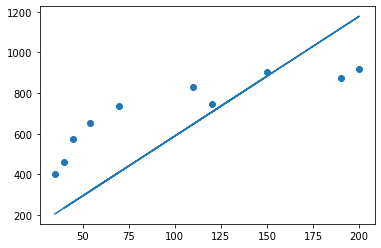

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(zp, ks)
plt.plot(zp,5.8898*zp)
plt.show()

_____
При intercept не равном 0:
$$y = \beta_0 + \beta_1\cdot x$$

In [45]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
b = ((np.mean(zp*ks)-ks.mean()*zp.mean())) / (np.mean(zp**2) - zp.mean()**2)
a = ks.mean() - b * zp.mean()
print(f'Коэффициент a = {a}, b = {b}')

Коэффициент a = 444.1773573243596, b = 2.620538882402765


In [46]:
# Решим матричным способом
X = zp.reshape((10,1))
X = np.hstack([np.ones((10,1)), X])
y = ks.reshape((10,1))
B = np.dot(np.linalg.inv(np.dot(X.T, X)),X.T@y)
B

array([[444.17735732],
       [  2.62053888]])

Модель:
$$\hat{y} = 444.177 + 2.62x$$

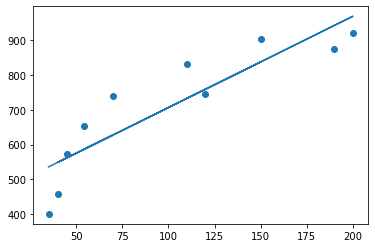

In [48]:
plt.scatter(zp, ks)
plt.plot(zp, 444.177 + 2.62 * zp)
plt.show()

**2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).**

In [49]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
alpha = 1e-6

In [50]:
def mse_(B1, y=ks, X=zp,n=10):
    return np.sum((B1*X-y)**2)/n

In [52]:
B1 = 0.1
n = 10
for i in range(3000):
    B1 -= alpha*(2/n)*np.sum((B1*zp-ks)*zp)
    if i%300 ==0:
        print(f'Iteration: {i}, B1={B1}, mse={mse_(B1)}')

Iteration: 0, B1=0.25952808, mse=493237.7212546963
Iteration: 300, B1=5.888531320728348, mse=56516.88130936019
Iteration: 600, B1=5.889820124983314, mse=56516.85841572062
Iteration: 900, B1=5.889820420065112, mse=56516.85841571941
Iteration: 1200, B1=5.889820420132673, mse=56516.85841571943
Iteration: 1500, B1=5.889820420132673, mse=56516.85841571943
Iteration: 1800, B1=5.889820420132673, mse=56516.85841571943
Iteration: 2100, B1=5.889820420132673, mse=56516.85841571943
Iteration: 2400, B1=5.889820420132673, mse=56516.85841571943
Iteration: 2700, B1=5.889820420132673, mse=56516.85841571943


**3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).**

In [53]:
def mse_2(B0, B1, y=ks, X=zp, n=10):
    return np.sum((B0 + B1 * X - y) ** 2) / n

In [68]:
alpha = 1e-5

In [70]:
B0 = 0.1
B1 = 0.1
n = 10
for i in range(3000000):
    y_pred = B0 + B1 * zp
    B0 -= alpha*(2/n)*np.sum(y_pred - ks)
    B1 -= alpha*(2/n)*np.sum((y_pred - ks) * zp)
    if i%300000 ==0:
        print(f'Iteration: {i}, B0={B0}, B1={B1}, mse={mse_2(B0, B1)}')

Iteration: 0, B0=0.1139932, B1=1.6950780000000003, mse=298805.38996099564
Iteration: 300000, B0=347.24756959921285, B1=3.333984975180734, mse=8853.693377127487
Iteration: 600000, B0=423.0181317603773, B1=2.77628013758468, mse=6583.983235150707
Iteration: 900000, B0=439.55841781180436, B1=2.6545363193656377, mse=6475.8260411356305
Iteration: 1200000, B0=443.1690688992334, B1=2.6279603310016144, mse=6470.672088478478
Iteration: 1500000, B0=443.95725365219454, B1=2.6221589427433236, mse=6470.4264901321585
Iteration: 1800000, B0=444.12930993504966, B1=2.6208925324310575, mse=6470.4147867752
Iteration: 2100000, B0=444.1668688504738, B1=2.6206160822077855, mse=6470.414229081847
Iteration: 2400000, B0=444.17506774970946, B1=2.6205557346844697, mse=6470.414202506412
Iteration: 2700000, B0=444.17685752314003, B1=2.620542561160716, mse=6470.414201240024
